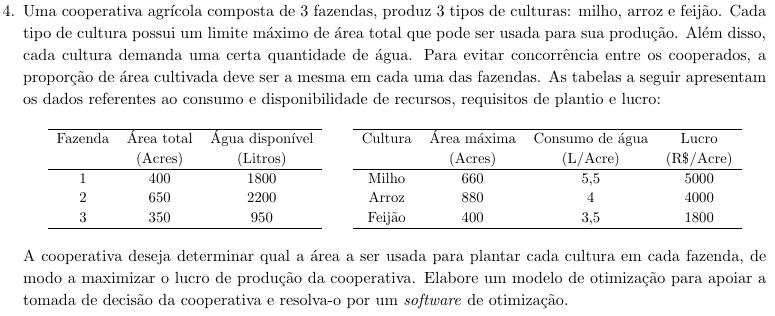

In [1]:
from IPython.display import Image
Image(filename='images/4.png')

In [2]:
Culturas = ['Milho', 'Arroz', 'Feijão']
Fazendas = [1, 2, 3]
area_max_C = {'Milho': 660, 'Arroz': 880, 'Feijão': 400}
demanda_agua_C = {'Milho': 5.5, 'Arroz': 4, 'Feijão': 3.5}
area_F = {1: 400, 2: 650, 3: 350}
agua_F = s = {1: 1800, 2: 2200, 3: 950}
lucro = {'Milho': 5000, 'Arroz': 4000, 'Feijão': 1800}

In [3]:
# Módulos
from pyomo.environ import *
from pyomo.opt import SolverFactory

In [4]:
# Modelo
model = ConcreteModel()

# Conjuntos
model.C = Set(initialize=Culturas)
model.F = Set(initialize=Fazendas)
C = model.C
F = model.F

# Parâmetros
model.a = Param(C, initialize=area_max_C, within=NonNegativeReals)
model.b = Param(C, initialize=demanda_agua_C, within=NonNegativeReals)
model.s = Param(F, initialize=area_F, within=NonNegativeReals)
model.l = Param(F, initialize=agua_F, within=NonNegativeReals)
model.p = Param(C, initialize=lucro, within=NonNegativeReals)
a = model.a
b = model.b
s = model.s
l = model.l
p = model.p

# Variáveis de decisão
model.x = Var(C * F, within=NonNegativeReals)
model.y = Var(within=NonNegativeReals)
x = model.x
y = model.y

# Função objetivo
model.obj = Objective(sense=maximize,
                      expr = sum(sum(p[i] * x[i,j] for i in C) for j in F))

# Restrições
# Área máxima da cultura
model.r_area_C = ConstraintList()
for i in C:
    model.r_area_C.add(expr = sum(x[i, j] for j in F) <= a[i])
# Consumo de água
model.r_agua = ConstraintList()
for j in F:
    model.r_agua.add(expr = sum(b[i] * x[i,j] for i in C) <= l[j])
# Área máxima da fazenda
model.r_area_F = ConstraintList()
for j in F:
    model.r_area_F.add(expr = sum(x[i,j] for i in C) <= s[j])
# Proporcao (área total é proporcionalmente a mesma)
model.r_var = ConstraintList()
for j in F:
    model.r_var.add(expr = sum(x[i,j] for i in C)/s[j] == y)

# model.pprint()

In [5]:
# Resolução
solver = SolverFactory('glpk')
resultado = solver.solve(model, tee=False)

In [6]:
# Apresentação de resultados
if (resultado.solver.status == SolverStatus.ok) and (resultado.solver.termination_condition != TerminationCondition.infeasible):
    for j in F:
        for i in C:
            print('Área de {} plantada na fazenda {}: {:.3f} acres.'.format(i, j, value(x[i,j])))
        print('Percentual de área plantada na fazenda {}: {:.2f}%'.format(j, value(y) * 100))
        print()
    print('O lucro máximo obtido é de R${:.2f}'.format(value(model.obj)))
else:
    print(resultado.solver.termination_condition)

Área de Milho plantada na fazenda 1: 271.429 acres.
Área de Arroz plantada na fazenda 1: 0.000 acres.
Área de Feijão plantada na fazenda 1: 0.000 acres.
Percentual de área plantada na fazenda 1: 67.86%

Área de Milho plantada na fazenda 2: 290.476 acres.
Área de Arroz plantada na fazenda 2: 150.595 acres.
Área de Feijão plantada na fazenda 2: 0.000 acres.
Percentual de área plantada na fazenda 2: 67.86%

Área de Milho plantada na fazenda 3: 0.000 acres.
Área de Arroz plantada na fazenda 3: 237.500 acres.
Área de Feijão plantada na fazenda 3: 0.000 acres.
Percentual de área plantada na fazenda 3: 67.86%

O lucro máximo obtido é de R$4361904.76
